In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [2]:
heartData=pd.read_csv("Medicaldataset.csv")

In [3]:
heartData

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
heartData.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1314    False
1315    False
1316    False
1317    False
1318    False
Length: 1319, dtype: bool

In [5]:
heartData.duplicated(keep=False).sum()

0

In [6]:
heartData.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [7]:
missingData=heartData.isnull().sum()
missingData

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

<Axes: >

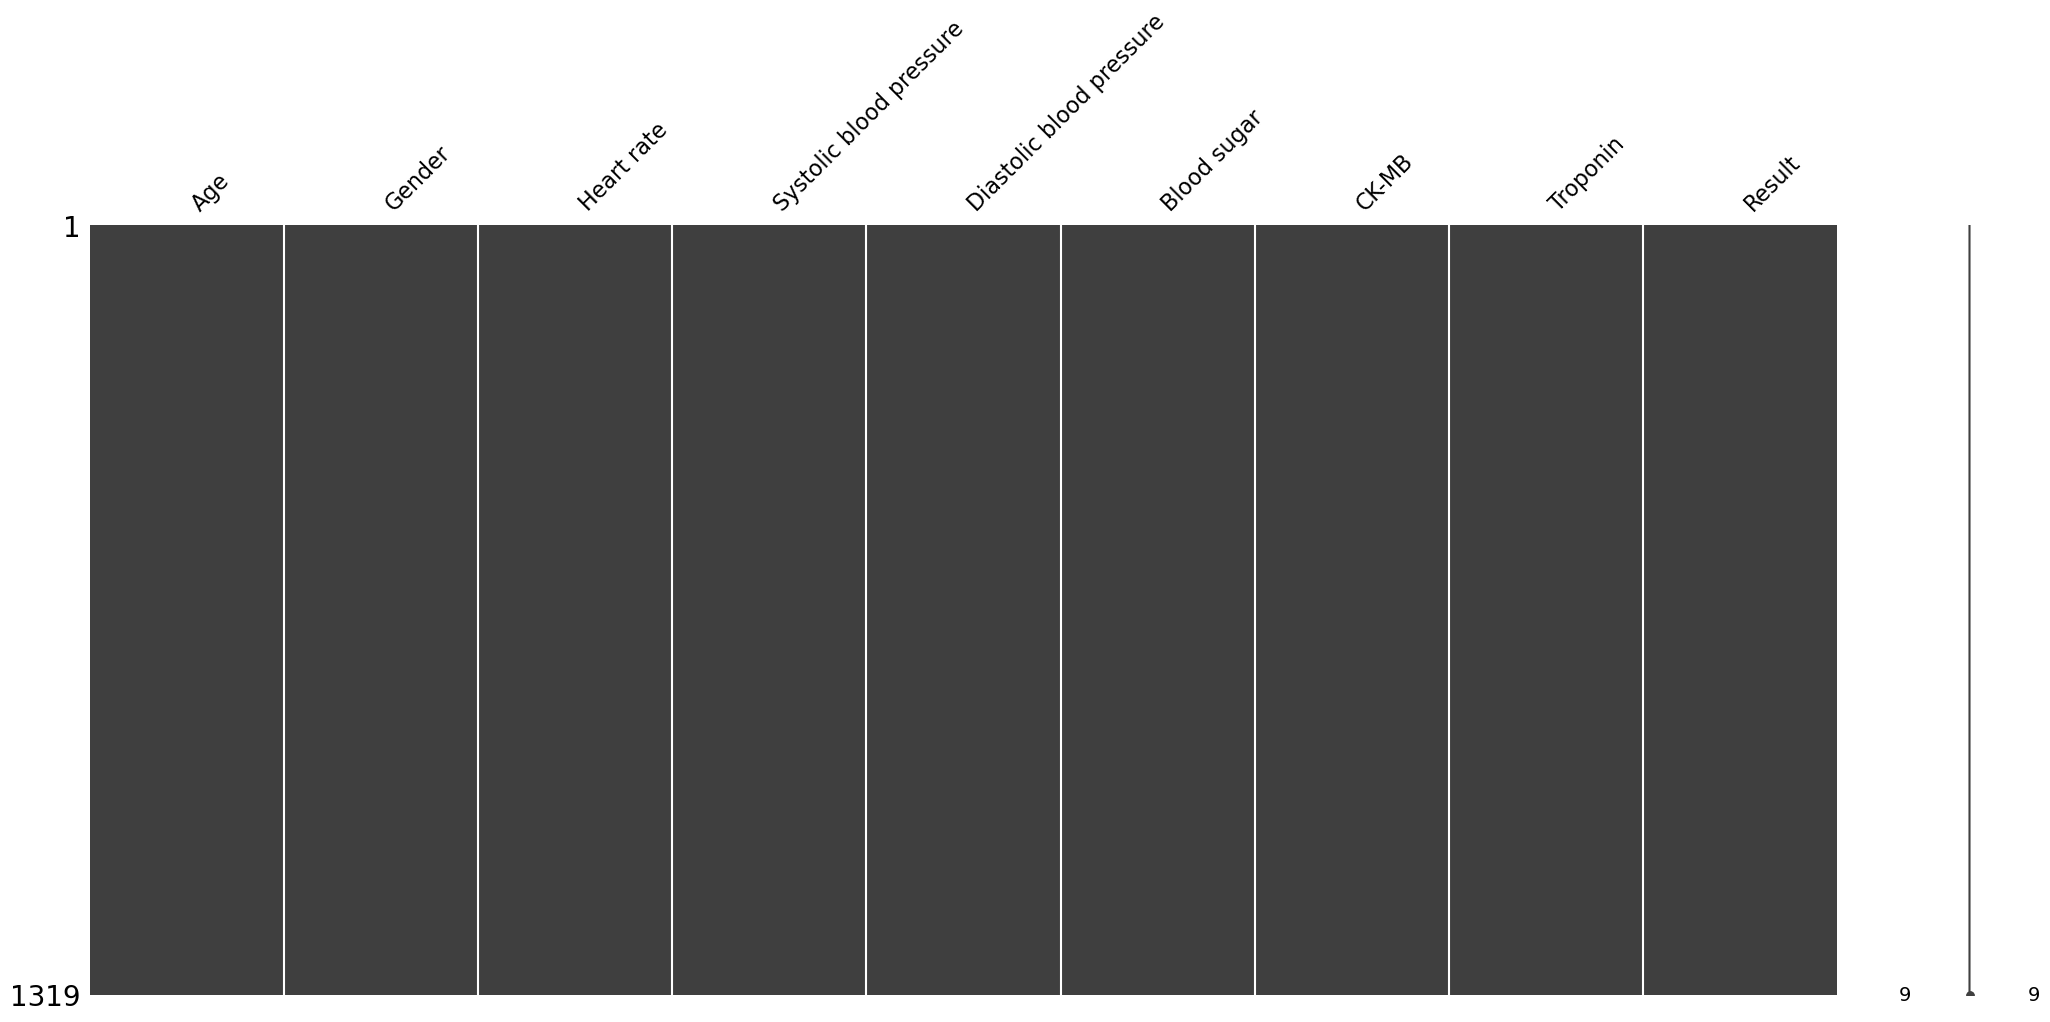

In [8]:
msno.matrix(heartData)

In [9]:
#separating continuous data from categorical data
continuousHearts=heartData.select_dtypes(exclude='object')
continuousHearts

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,63,1,66,160,83,160.0,1.80,0.012
1,20,1,94,98,46,296.0,6.75,1.060
2,56,1,64,160,77,270.0,1.99,0.003
3,66,1,70,120,55,270.0,13.87,0.122
4,54,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [10]:
#categorical data
categoricalHearts=heartData.select_dtypes(include=['object']).columns
categoricalHearts

Index(['Result'], dtype='object')

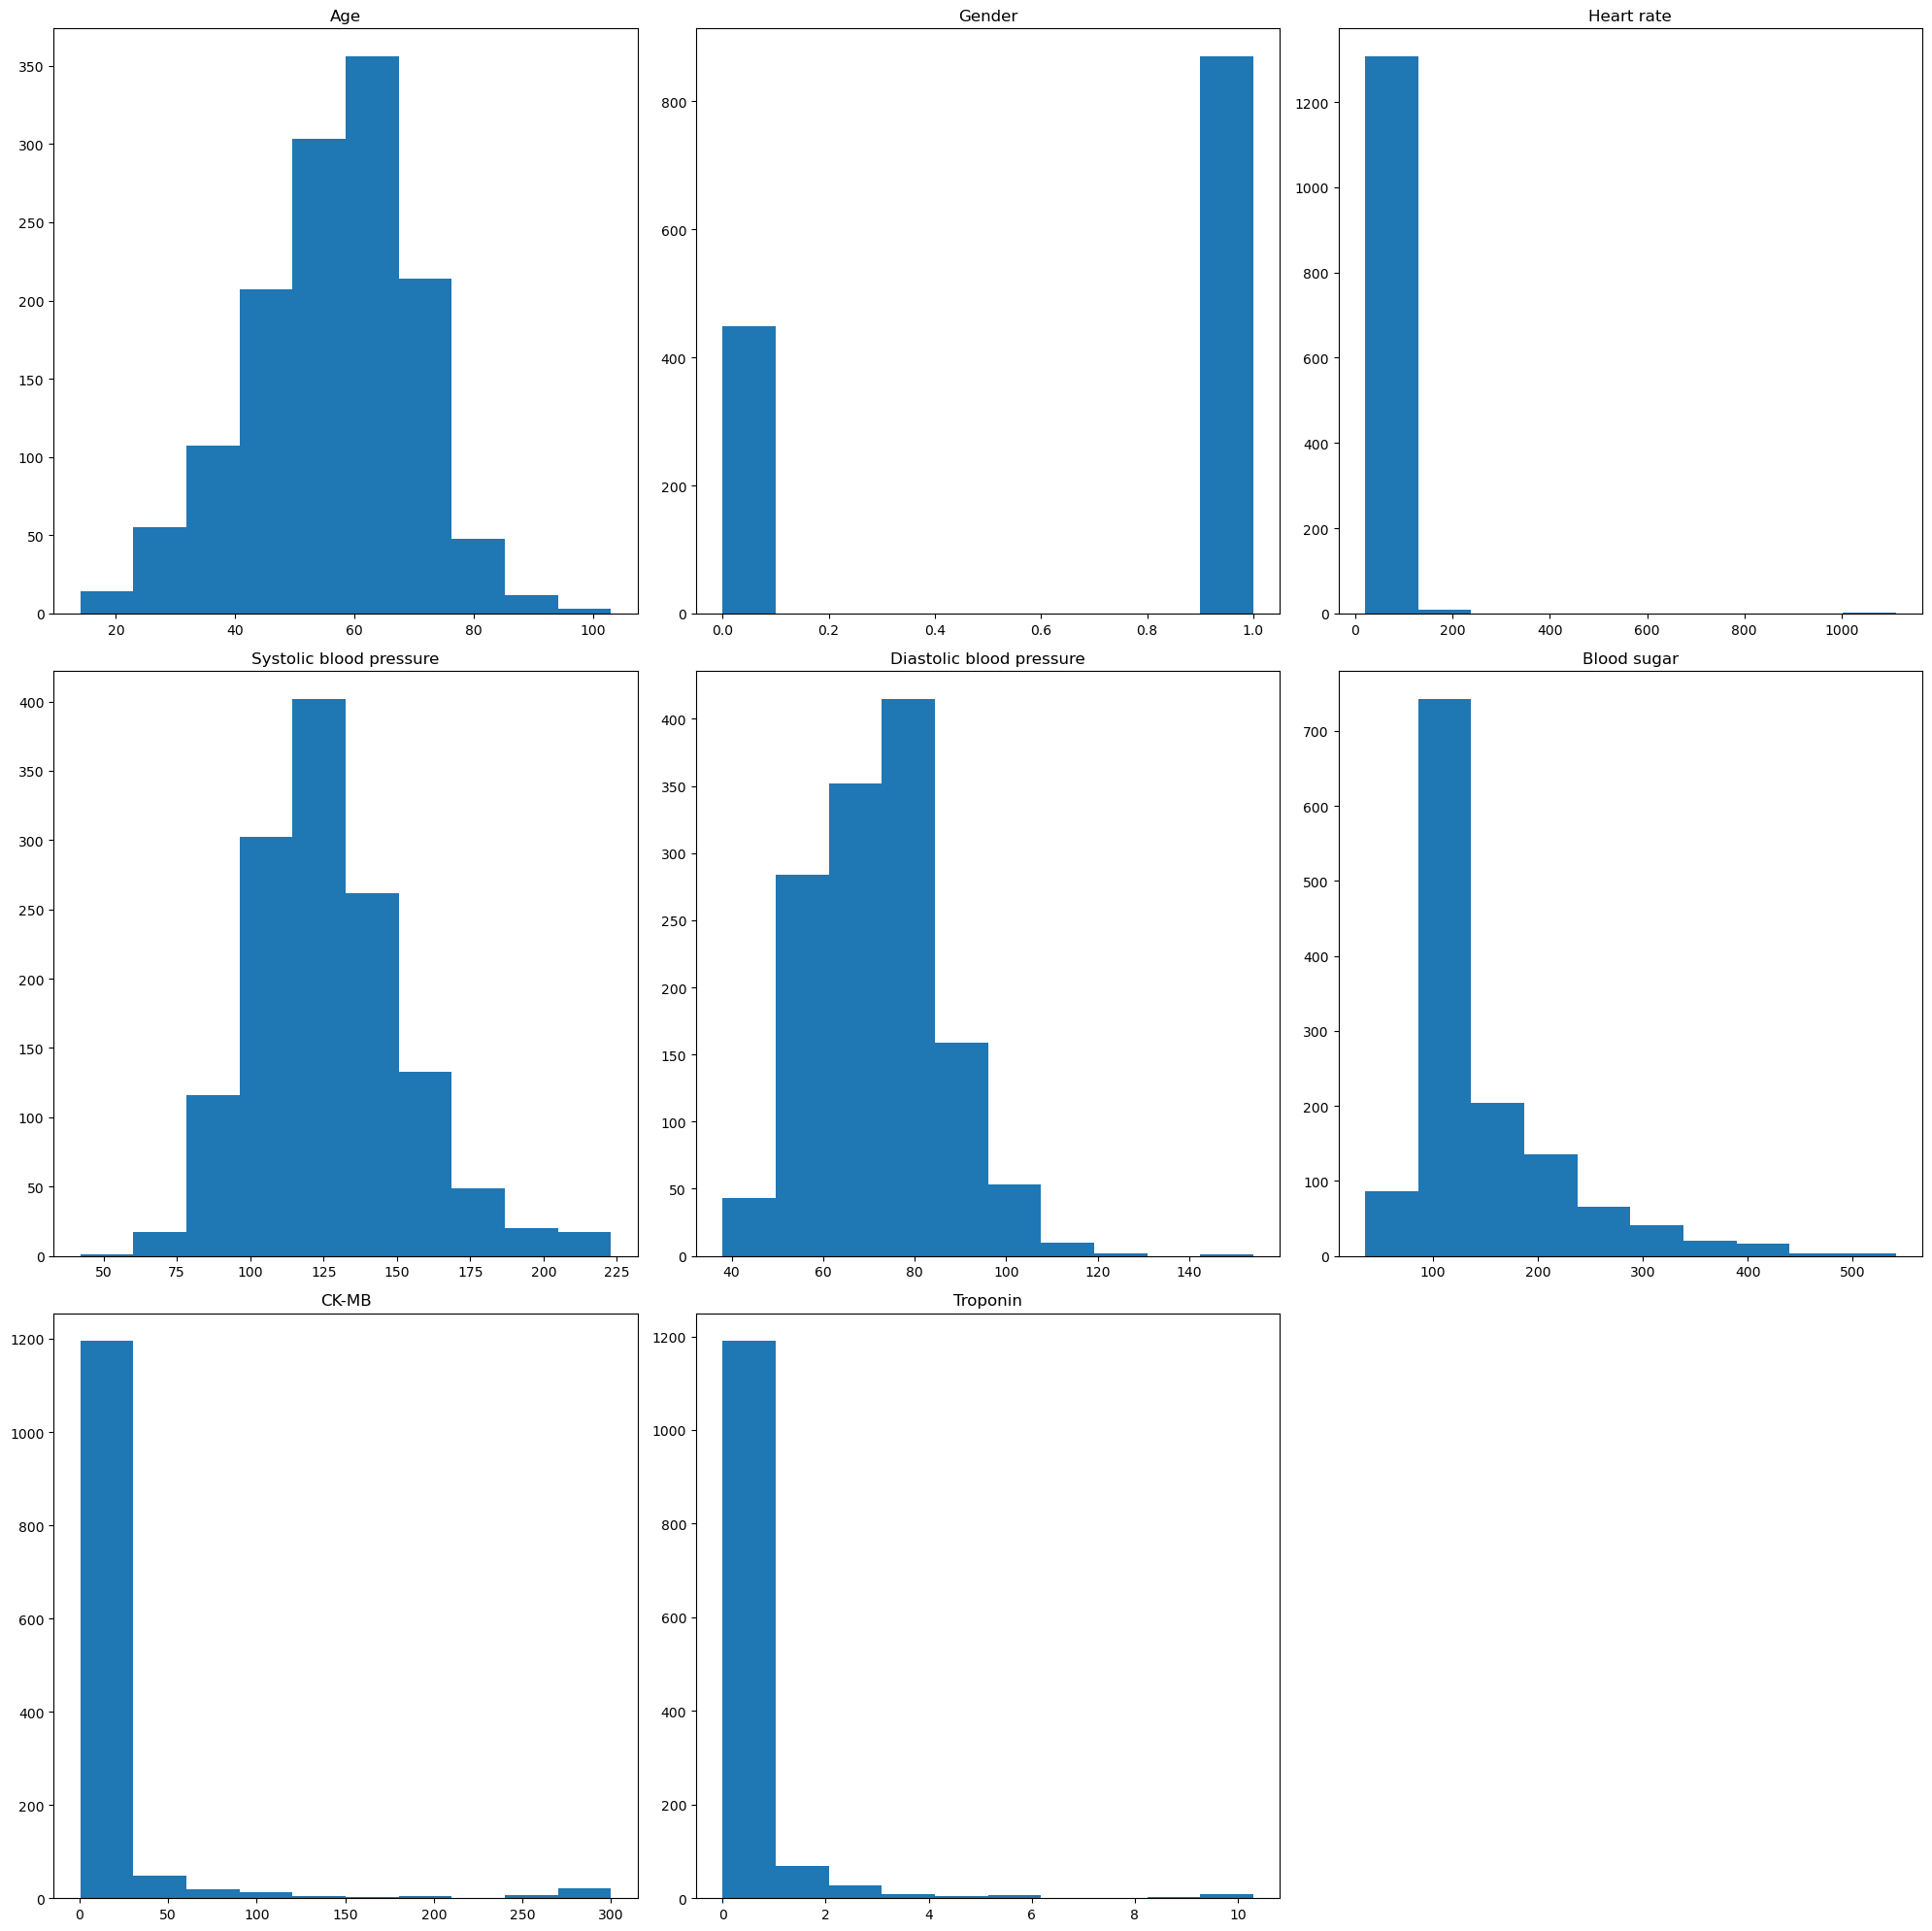

In [11]:
#VISUALIZATION OF CONTINUOUS DATA PLOTS
plt.figure(figsize=(20,20))
for i, col in enumerate(continuousHearts.columns):
    plt.subplot(3,3,i+1)
    plt.hist(heartData[col])
    plt.title(col)
plt.tight_layout()
plt.show()

HANDLING OUTLIERS

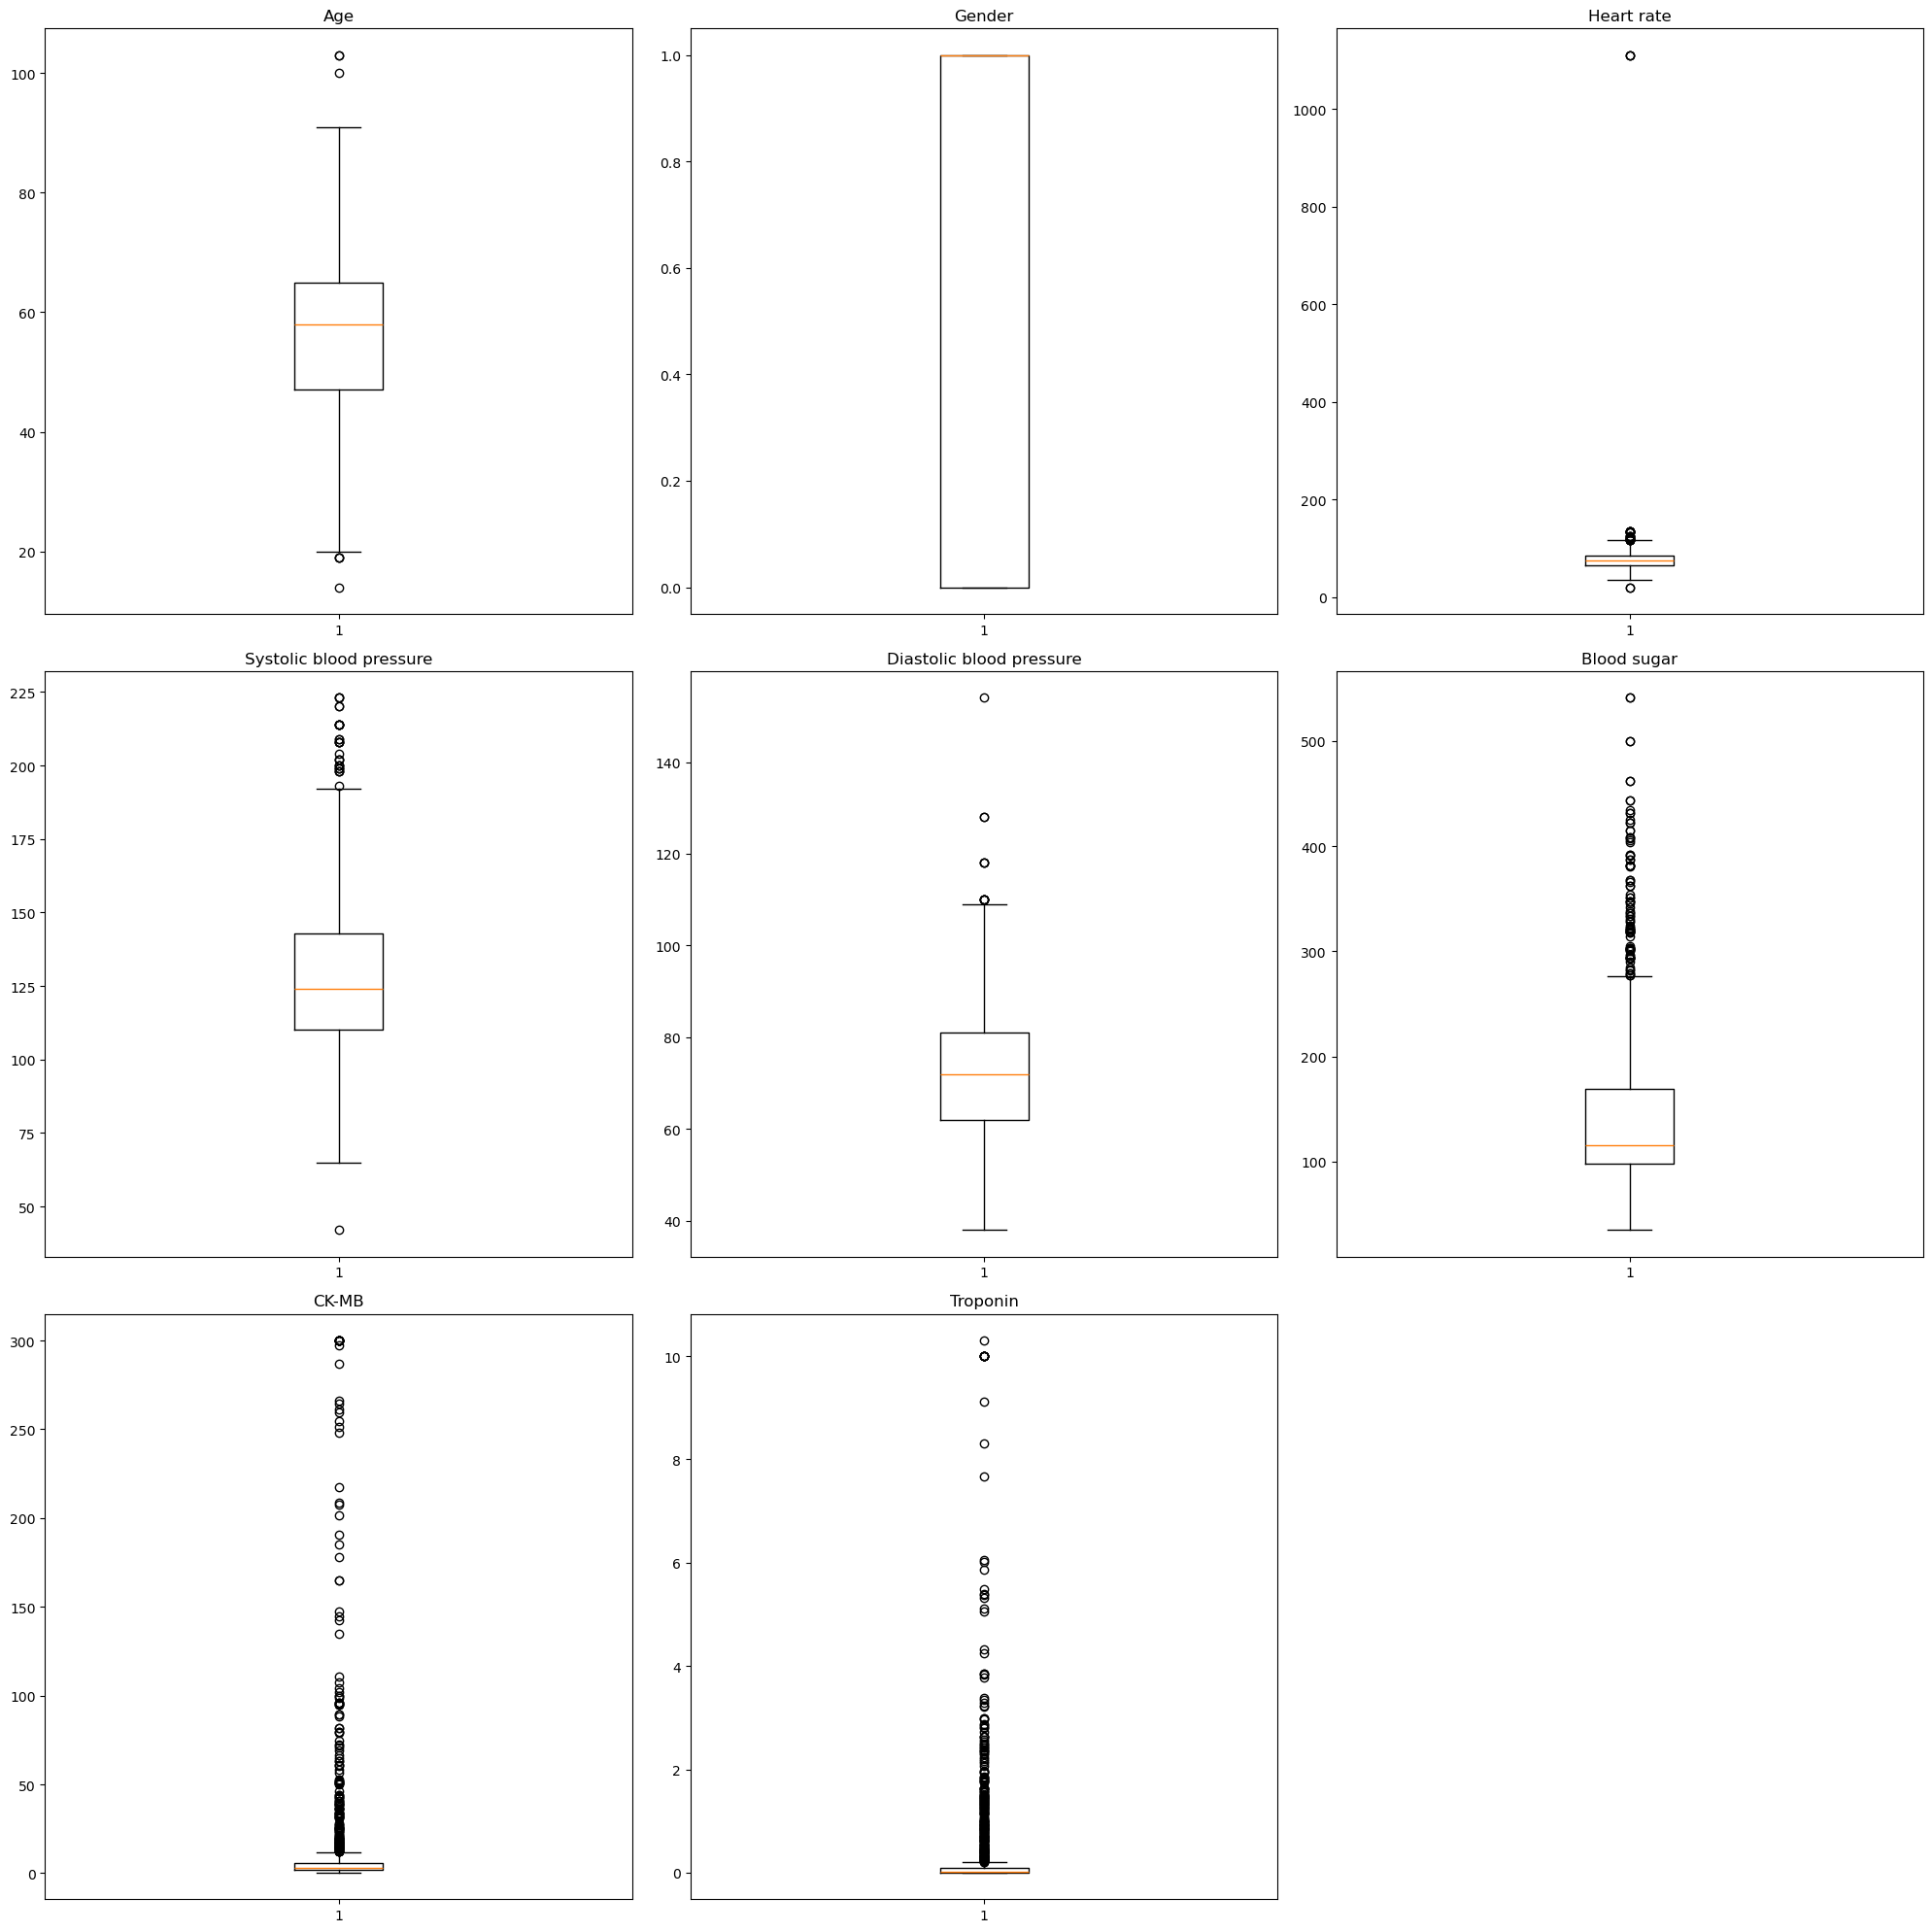

In [12]:
#viewing outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(continuousHearts.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(heartData[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
#removing outliers
#using IQR
def removing_outliers(columns):
    for i in columns:
        lower_quantile=heartData[i].quantile(.25)
        upper_quantile=heartData[i].quantile(.75)

        IQR=upper_quantile-lower_quantile

        upper_boundary=upper_quantile+1.5*IQR
        lower_boundary=lower_quantile-1.5*IQR

        heartData[i]=np.where(heartData[i]>upper_boundary,upper_boundary,heartData[i])
        heartData[i]=np.where(heartData[i]<lower_boundary,lower_boundary,heartData[i])

In [14]:
removing_outliers(continuousHearts)

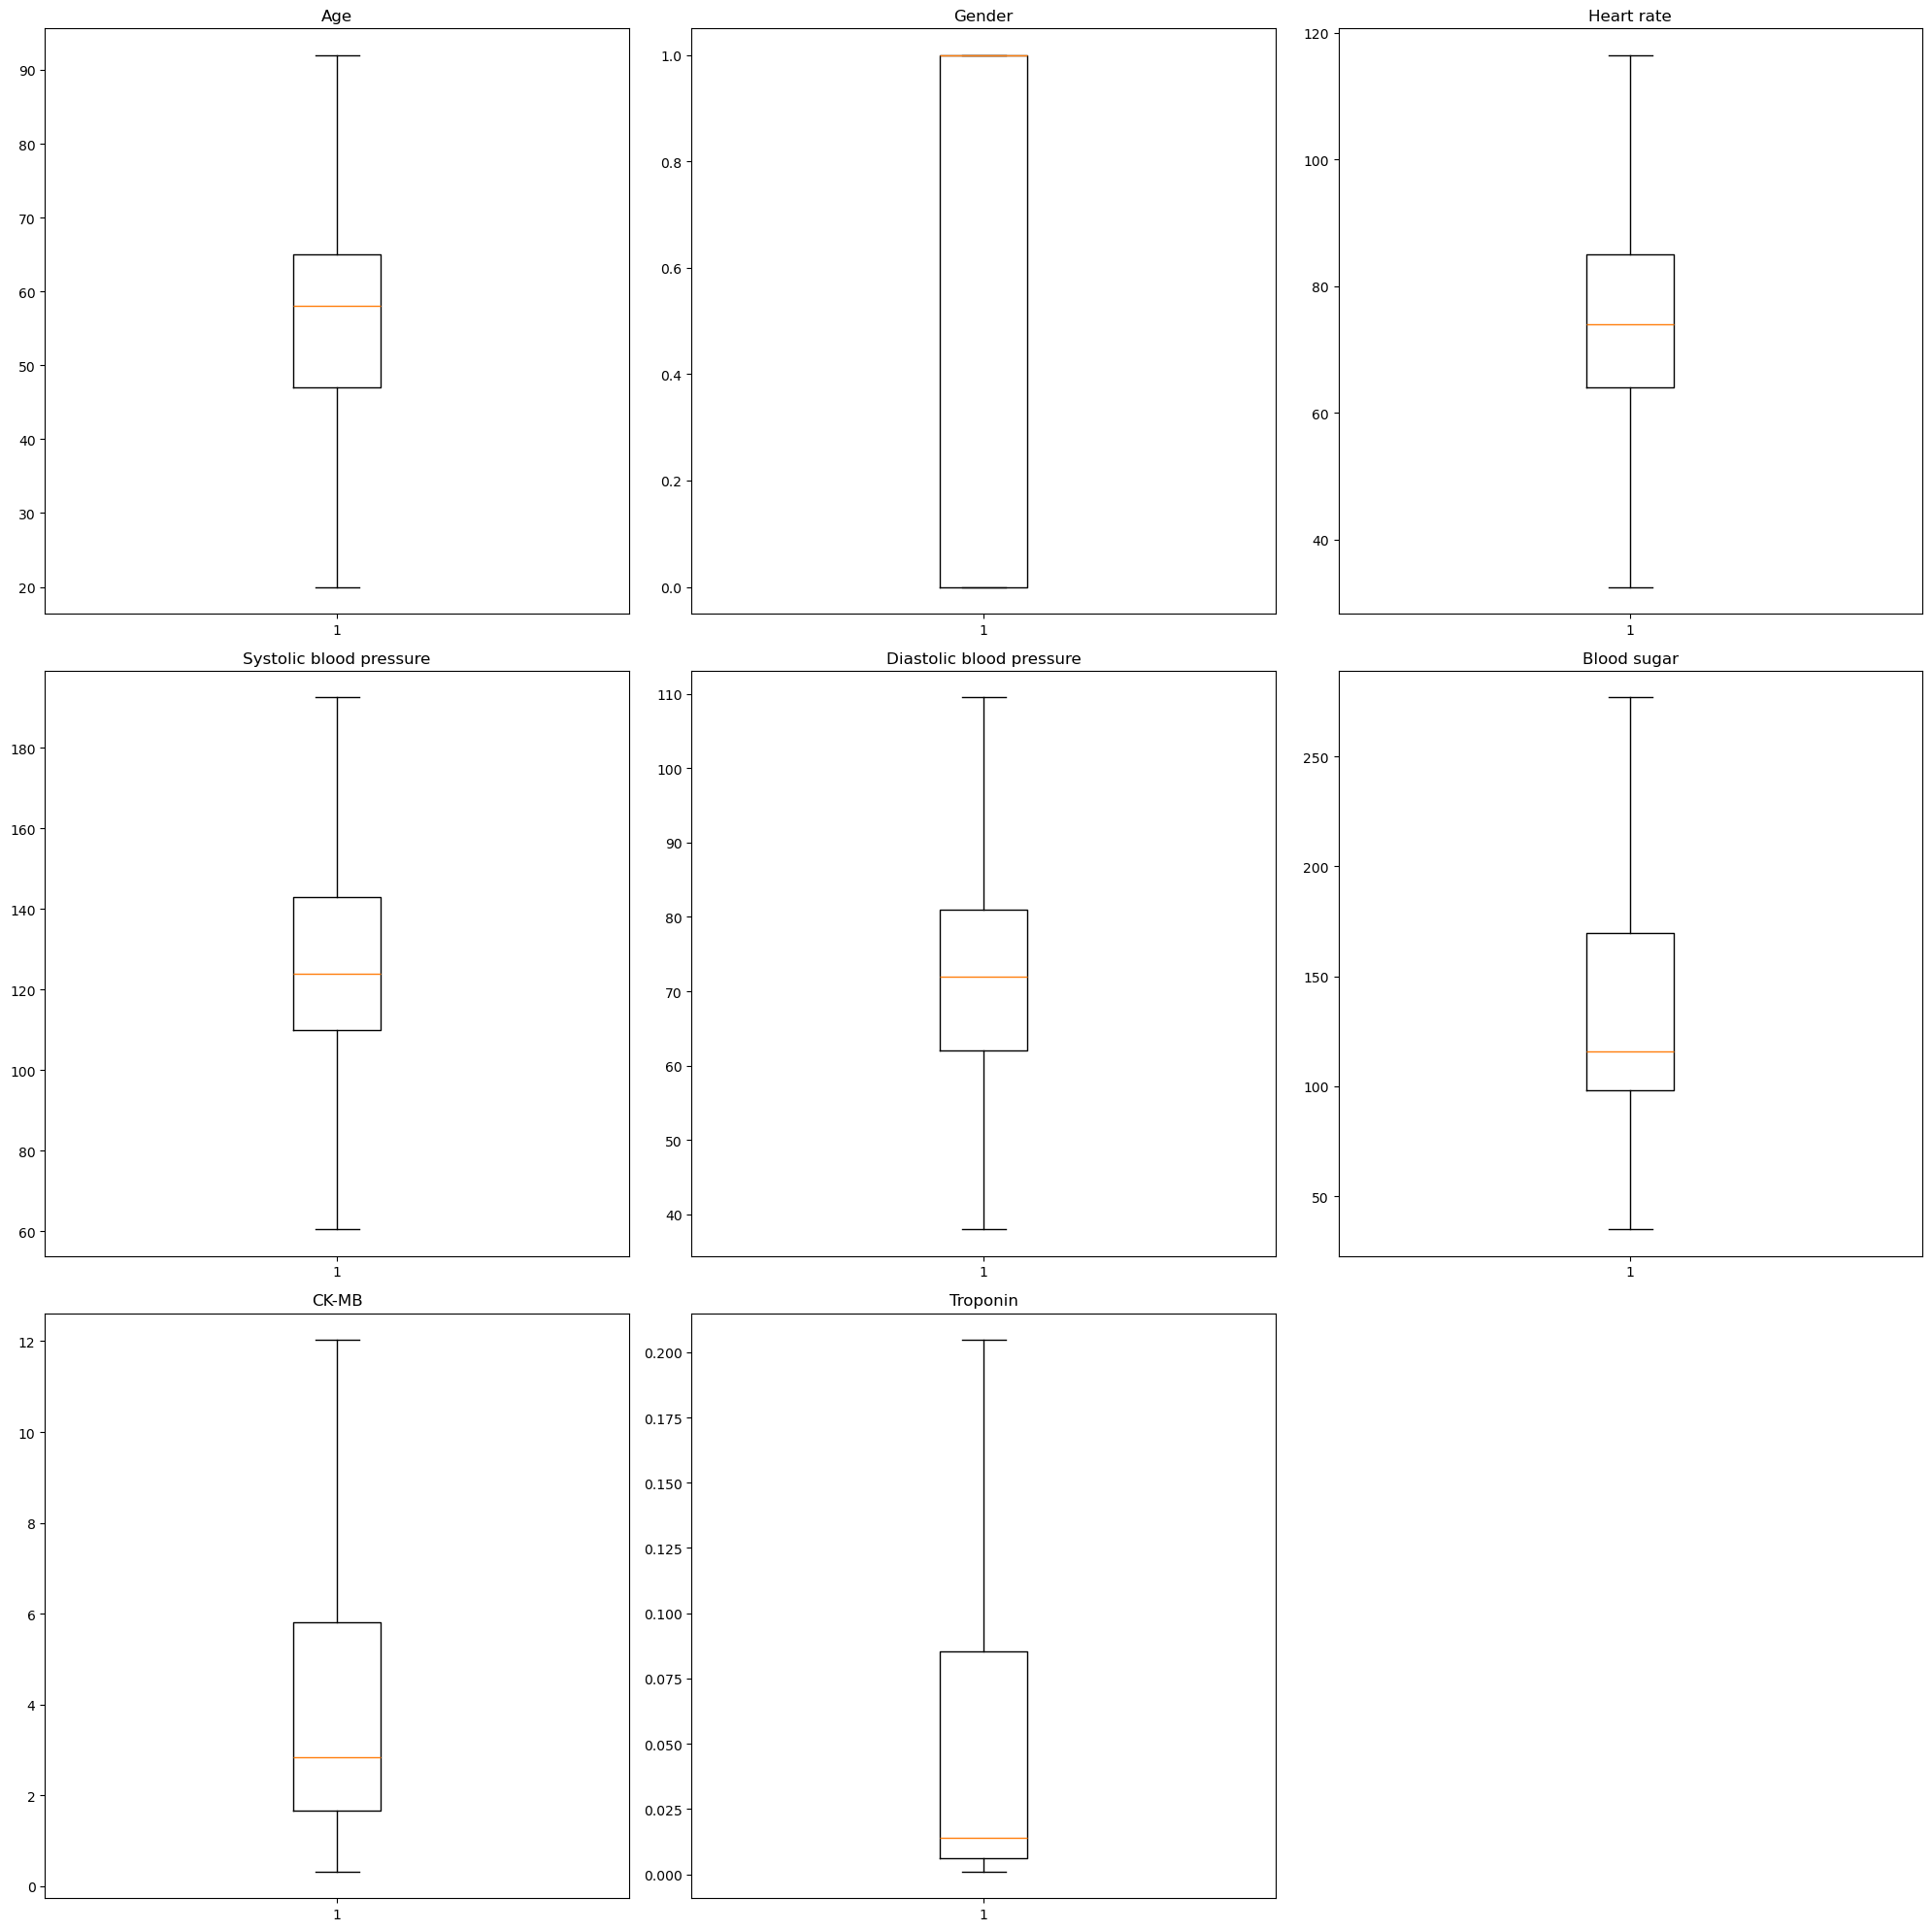

In [15]:
#viewing outliers
plt.figure(figsize=(20,20))
for i, col in enumerate(continuousHearts.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(heartData[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
AgeBins=[18,30,45,60,75,90]
AgeLabels=['18-30','31-45','46-60','61-75','76-90']
heartData['Age']=pd.cut(heartData['Age'],bins=AgeBins,labels=AgeLabels)

In [17]:
#create summary statistics (mean) for each group
summaryStats=heartData.groupby(['Age','Gender']).agg(
    avgHeartRate=('Heart rate','mean'),
    avgSystolicBP=('Systolic blood pressure','mean'),
    avgDiastolicBP=('Diastolic blood pressure','mean'),
    avgBloodSugar=('Blood sugar','mean'),
    avgCKMB=('CK-MB','mean'),
    avgTroponin=('Troponin','mean'),
).reset_index()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13192\1336988106.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summaryStats=heartData.groupby(['Age','Gender']).agg(


In [18]:
print(summaryStats)

     Age  Gender  avgHeartRate  avgSystolicBP  avgDiastolicBP  avgBloodSugar  \
0  18-30     0.0     74.166667     123.750000       70.361111     139.041667   
1  18-30     1.0     78.093023     129.209302       71.465116     141.000000   
2  31-45     0.0     76.632353     126.875000       74.823529     139.448529   
3  31-45     1.0     75.662577     124.926380       70.441718     139.955521   
4  46-60     0.0     75.190058     126.918129       73.438596     143.116667   
5  46-60     1.0     76.027778     126.796784       72.111111     146.138889   
6  61-75     0.0     76.306962     125.268987       71.069620     140.523734   
7  61-75     1.0     75.802448     128.377622       72.816434     136.403846   
8  76-90     0.0     76.140625     126.828125       68.593750     136.765625   
9  76-90     1.0     76.573529     126.588235       75.235294     140.110294   

    avgCKMB  avgTroponin  
0  4.765000     0.005611  
1  5.572698     0.027558  
2  4.045368     0.012467  
3  4.218785

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.float64' object has no attribute 'startswith'

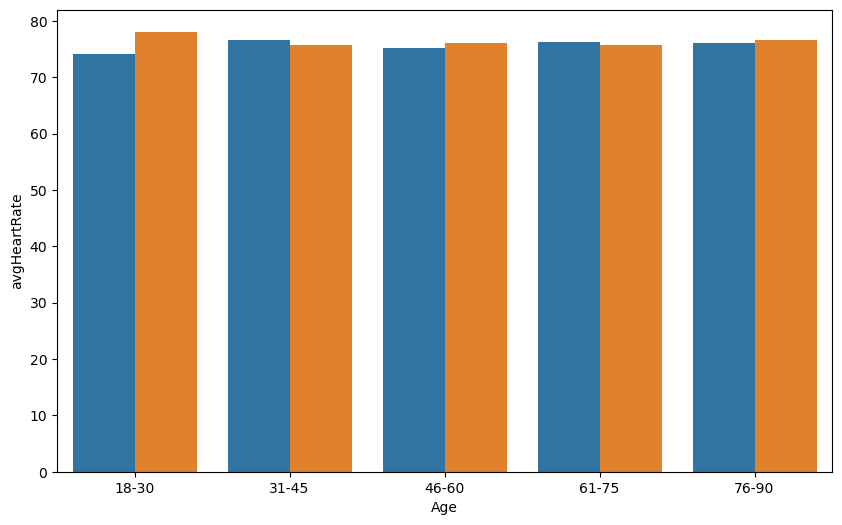

In [19]:
#visualizing average heart rate by age group and gender
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='avgHeartRate',hue='Gender',data=summaryStats)
plt.title("Average Heart Rate by Age group and Gender")
plt.ylabel("Average Heart Rate")
plt.xlabel("Age group")
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.float64' object has no attribute 'startswith'

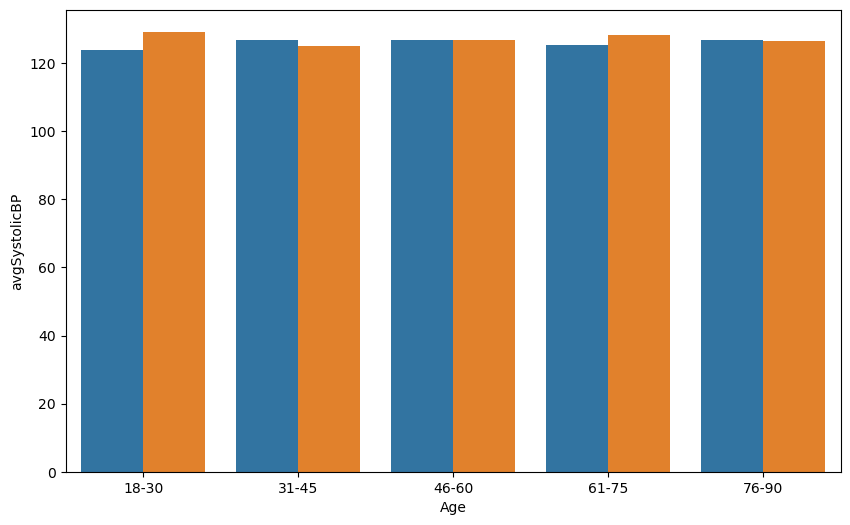

In [20]:
#visualizing average systolic BP by age group and gender
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='avgSystolicBP',hue='Gender',data=summaryStats)
plt.title("Average SystolicBP by Age group and Gender")
plt.ylabel("Average Systolic Blood Pressure")
plt.xlabel("Age group")
plt.show()